In [1]:
# Below we have sections of short driver scripts that run different parts of the heatmap code
# Not all functions in the 5 functiond definition .py's are called yet,
# but the ones that are called so far compile below without error

In [2]:
import importlib
import setup_nx # your own module, setup.nx.py
import numpy as np
import math as m
import statistics as st
import cmath
import matplotlib.pyplot as plt 
import itertools
from operator import add
importlib.reload(setup_nx)
from setup_nx import *
from graphviz import Source, render

import datetime
import time

import my_feeder_funcs as ff
import my_impedance_funcs as imp
import my_configVis_funcs as vis
import my_detControlMatExistence_funcs as ctrl
import my_detLznRange_funcs as lzn
import my_heatmapSetup_funcs as hm


<class 'module'>


In [3]:
# # List functions in each helper .py
# help(ff)
# print("----------------------------------------------------------")
# help(imp)
# print("----------------------------------------------------------")
# help(vis)
# print("----------------------------------------------------------")
# help(lzn)
# print("----------------------------------------------------------")
# help(hm)
# print("----------------------------------------------------------")
# help(ctrl)

In [4]:
# [Essential] specify input feeder data

#-----------------------------------------------------------------
'specifying file paths'
# Enter the path/name of the model's excel file and import
    # All GridBright load files should be in the following folder
    #loadfolder = "/Users/jasperpakshong/Documents/Berkeley/ENERGISE/IEEE13/"
    #loadpath = loadfolder + "IEEE13testload_w_extreme_act.xlsx"

    # filepath = "IEEE13/"
    # modelpath = filepath + "001 phasor08_IEEE13_OPAL.xls"
    # loadfolder = "IEEE13/"
    # loadpath = loadfolder + "001_phasor08_IEEE13_norm03_HIL_7_1.xlsx"

    #filepath = "AL0001/"
    #modelpath = filepath + "AL0001_OPAL_working.xls"
    #loadfolder = "AL0001/"
    #loadpath = loadfolder + "AL0001_tvload_afternoon1h.csv"
      
    #filepath = "13NF_balanced/"
    #modelpath = filepath + "016 GB_IEEE13_balance_all_ver2.xls"
    #loadfolder = "13NF_balanced/"
    #loadpath = loadfolder + "016 GB_IEEE13_balance all ver2_time_sigBuilder_secondWise_norm03.csv"

filepath = "123NF/"
modelpath = filepath + "004_GB_IEEE123_OPAL.xls"
loadfolder = "123NF/"
loadpath = loadfolder + "004_GB_IEEE123_time_sigBuilder_secondwise_norm1.csv"
headerpath = '??13NF_balanced/001_phasor08_IEEE13_time_header.csv'
load_data = '??13NF_balanced/001_phasor08_IEEE13_time_PVpen50_cloud_minutewise (1).csv'


#==========================================================================================================

'specifying file name'
#file_name = string specifying name of dot file created when make_graph() is called
file_name = '123NF_test.dot'

#==========================================================================================================

'list actuator locations and performance node'
# all_act_locs = list of node names as strings where actuators will be placed
all_act_locs = ['bus_39','bus_40','bus_53']
perf_nodes = ['bus_39','bus_40','bus_53']

#==========================================================================================================

'Specify substation kV, kVA bases, name, and the number of timesteps in the load data'
Vbase_ll = 4160
Vbase = Vbase_ll / np.sqrt(3)
Sbase = 5000/3
substation_name = 'bus_150'
timesteps = 1

'DO NOT NEED TO EDIT THIS CELL BEFORE RUNNING'

ts = time.time()
print()
print(datetime.datetime.fromtimestamp(ts))

plot = 0 #turn plot on/off

depths = {}
leaves = []


2020-08-03 14:31:21.424788


  File "C:\Users\jaimi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\jaimi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\events.py", line 88, in _r

Finished initializing feeder


  File "C:\Users\jaimi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\jaimi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\events.py", line 88, in _r

{'bus_150': 0, 'bus_149': 1, 'bus_1': 2, 'bus_2': 3, 'bus_3': 3, 'bus_7': 3, 'bus_4': 4, 'bus_5': 4, 'bus_8': 4, 'bus_6': 5, 'bus_12': 5, 'bus_14': 5, 'bus_13': 5, 'bus_9': 6, 'bus_11': 6, 'bus_10': 6, 'bus_34': 6, 'bus_18': 6, 'bus_152': 6, 'bus_15': 7, 'bus_19': 7, 'bus_21': 7, 'bus_135': 7, 'bus_52': 7, 'bus_16': 8, 'bus_17': 8, 'bus_20': 8, 'bus_22': 8, 'bus_23': 8, 'bus_35': 8, 'bus_53': 8, 'bus_24': 9, 'bus_25': 9, 'bus_36': 9, 'bus_40': 9, 'bus_54': 9, 'bus_26': 10, 'bus_28': 10, 'bus_37': 10, 'bus_38': 10, 'bus_41': 10, 'bus_42': 10, 'bus_55': 10, 'bus_57': 10, 'bus_27': 11, 'bus_31': 11, 'bus_29': 11, 'bus_39': 11, 'bus_43': 11, 'bus_44': 11, 'bus_56': 11, 'bus_58': 11, 'bus_60': 11, 'bus_33': 12, 'bus_32': 12, 'bus_30': 12, 'bus_45': 12, 'bus_47': 12, 'bus_59': 12, 'bus_61': 12, 'bus_62': 12, 'bus_160': 12, 'bus_250': 13, 'bus_46': 13, 'bus_48': 13, 'bus_49': 13, 'bus_610': 13, 'bus_610_': 13, 'bus_63': 13, 'bus_67': 13, 'bus_251': 14, 'bus_50': 14, 'bus_64': 14, 'bus_68': 14

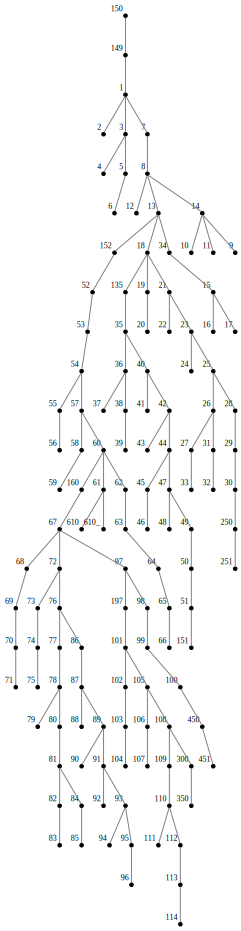

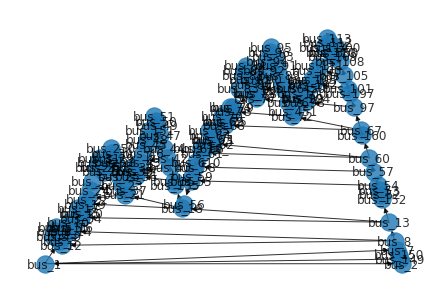

In [5]:
# [ESSENTIAL] create feeder obj
fin_feeder = ff.feeder_init(modelpath,loadfolder,loadpath,timesteps,Vbase_ll,Sbase,depths,leaves)
print("Finished initializing feeder")
ff.make_graph(fin_feeder, file_name)
node_index_map = hm.createNodeIndexMap(fin_feeder) #node indices for indicMat and F matrix
R,X=hm.createRXmatrices_3ph(fin_feeder, node_index_map,depths)

print(depths) # should be populated

count = 0 # print list of buses in network
for i in fin_feeder.network:    
    print(i) 
    count += 1
    if count >= 10:
        break
    
Source.from_file(file_name)
#^ need this to plot feeder

In [6]:
# [Optional] run impedance-related functions
slack_bus = None
for bus_name, depth in depths.items():
    if depth == 0:
        slack_bus = bus_name
        break
        
# -------------------- now we call functions: ---------------------------------------------
#print(depths)
# modify node names when change feeders
#plot_histogram_RX_ratios(fin_feeder, leaves_only = True)
print('Z between buses:')
print(np.around(imp.get_total_impedance_between_two_buses(fin_feeder, 'bus_37', 'bus_15',depths),2))
print('\nBus 49 Z to substation:')
print(np.around(imp.get_total_impedance_from_substation(fin_feeder, 'bus_49',depths),2))
print('\nR/X ratio of bus 49 to substation:')
print(imp.get_RX_ratio_tosubst(fin_feeder,'bus_49',depths))
# should check on how to format the printing do that it's to like 2 decimal places

print('R/X Ratios:')
print('\n67 to 79: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_79',depths))
print('\n67 to 96: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_96',depths))
print('\n67 to 104: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_104',depths))
print('\n67 to 114: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_114',depths))
print('\n57 to 66: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_57', 'bus_66',depths))
print('\n18 to 251: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_18', 'bus_251',depths))
print('\n35 to 151: ')
print(imp.get_RX_ratio_between_two_buses(fin_feeder, 'bus_35', 'bus_151',depths))

Z between buses:
[[0.24+0.45j 0.05+0.16j 0.11+0.24j]
 [0.05+0.16j 0.09+0.22j 0.04+0.1j ]
 [0.11+0.24j 0.04+0.1j  0.17+0.31j]]

Bus 49 Z to substation:
[[0.31+0.74j 0.11+0.34j 0.32+0.71j]
 [0.11+0.34j 0.1 +0.26j 0.11+0.29j]
 [0.32+0.71j 0.11+0.29j 0.31+0.73j]]

R/X ratio of bus 49 to substation:
{'Phase 1': 0.42, 'Phase 2': 0.14, 'Phase 3': 0.43}
R/X Ratios:

67 to 79: 
{'Phase 1': 0.42, 'Phase 2': 0.14, 'Phase 3': 0.43}

67 to 96: 
{'Phase 1': 0.42, 'Phase 2': 0.24, 'Phase 3': 0.43}

67 to 104: 
{'Phase 1': 0.42, 'Phase 2': 0.14, 'Phase 3': 3.51}

67 to 114: 
{'Phase 1': 0.8, 'Phase 2': 0.05, 'Phase 3': 0.14}

57 to 66: 
{'Phase 1': 1.36, 'Phase 2': 0.44, 'Phase 3': 1.36}

18 to 251: 
{'Phase 1': 0.42, 'Phase 2': 0.14, 'Phase 3': 0.43}

35 to 151: 
{'Phase 1': 0.42, 'Phase 2': 0.14, 'Phase 3': 0.43}


In [7]:
# Print 3-phase node_index table
my_buses=list(node_index_map.keys())
my_list=list(node_index_map.values())
list1 = [(i+1) * 3-2 for i in my_list]
list2 = [(i+1) * 3-1 for i in my_list]
list3 = [(i+1) * 3-0 for i in my_list]
for my_buses,list1, list2,list3 in zip(my_buses,list1,list2,list3):
    print(my_buses,list1, list2,list3)
#Table format: [bus_name, phaseA idx, phaseB idx, phaseC idx]
# indices are shifted by 1 to be for MATLAB (starts at 1 not 0)

bus_1 1 2 3
bus_10 4 5 6
bus_100 7 8 9
bus_101 10 11 12
bus_102 13 14 15
bus_103 16 17 18
bus_104 19 20 21
bus_105 22 23 24
bus_106 25 26 27
bus_107 28 29 30
bus_108 31 32 33
bus_109 34 35 36
bus_11 37 38 39
bus_110 40 41 42
bus_111 43 44 45
bus_112 46 47 48
bus_113 49 50 51
bus_114 52 53 54
bus_12 55 56 57
bus_13 58 59 60
bus_135 61 62 63
bus_14 64 65 66
bus_149 67 68 69
bus_15 70 71 72
bus_150 73 74 75
bus_151 76 77 78
bus_152 79 80 81
bus_16 82 83 84
bus_160 85 86 87
bus_17 88 89 90
bus_18 91 92 93
bus_19 94 95 96
bus_197 97 98 99
bus_2 100 101 102
bus_20 103 104 105
bus_21 106 107 108
bus_22 109 110 111
bus_23 112 113 114
bus_24 115 116 117
bus_25 118 119 120
bus_250 121 122 123
bus_251 124 125 126
bus_26 127 128 129
bus_27 130 131 132
bus_28 133 134 135
bus_29 136 137 138
bus_3 139 140 141
bus_30 142 143 144
bus_300 145 146 147
bus_31 148 149 150
bus_32 151 152 153
bus_33 154 155 156
bus_34 157 158 159
bus_35 160 161 162
bus_350 163 164 165
bus_36 166 167 168
bus_37 169 170 171
bu

In [8]:
# R is of size 387, which is 129*3, so set n=129
n=129
A, B = hm.setupStateSpace(n,fin_feeder, node_index_map,depths)
print('R = '+str(R))
print('X = '+str(X))
print('A = '+str(A))
print('B = '+str(B))
print(A.shape)
print(B.shape)

# write A and B matrices to csv
#np.savetxt("123NF_Amat.csv", A, delimiter=",")
#np.savetxt("123NF_Bmat.csv", B, delimiter=",")

# Save R and X matrices to csv to import into matlab
# np.savetxt reference: https://thispointer.com/how-to-save-numpy-array-to-a-csv-file-using-numpy-savetxt-in-python/
#np.savetxt('Rmat_123NF.csv', R, delimiter=',')
#np.savetxt('Xmat_123NF.csv', X, delimiter=',')

R = [[0.06933333 0.02363636 0.07069697 ... 0.06933333 0.02363636 0.07069697]
 [0.02363636 0.02325758 0.02393939 ... 0.02363636 0.02325758 0.02393939]
 [0.07069697 0.02393939 0.06992424 ... 0.07069697 0.02393939 0.06992424]
 ...
 [0.06933333 0.02363636 0.07069697 ... 0.61966667 0.21125    0.63185417]
 [0.02363636 0.02325758 0.02393939 ... 0.21125    0.20786458 0.21395833]
 [0.07069697 0.02393939 0.06992424 ... 0.63185417 0.21395833 0.62494792]]
X = [[0.16333333 0.07601515 0.15881818 ... 0.16333333 0.07601515 0.15881818]
 [0.07601515 0.05831818 0.06418182 ... 0.07601515 0.05831818 0.06418182]
 [0.15881818 0.06418182 0.16137879 ... 0.15881818 0.06418182 0.16137879]
 ...
 [0.16333333 0.07601515 0.15881818 ... 1.45979167 0.67938542 1.4194375 ]
 [0.07601515 0.05831818 0.06418182 ... 0.67938542 0.52121875 0.573625  ]
 [0.15881818 0.06418182 0.16137879 ... 1.4194375  0.573625   1.44232292]]
A = [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0.

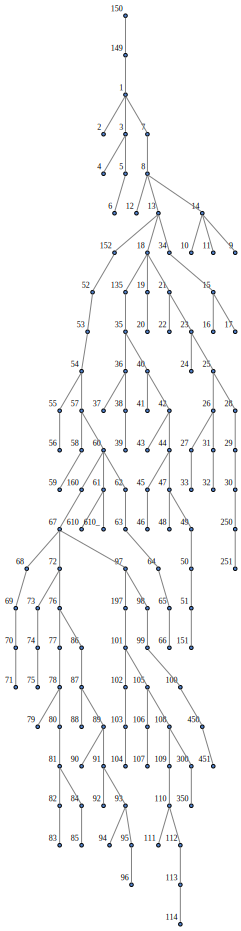

In [9]:
# Create figure 2
ratios = vis.phaseCouplingPerNode(fin_feeder,depths)
vis.createColorMap(fin_feeder, ratios)
Source.from_file('colorMap')

In [10]:
# detLznRange(feeder, Vbase_ll, Sbase, z12, act_locs)
#^ calls computePQsweep, makePVcurve, makeQVcurve, computeLznItvl
#loadfolder = "13NF_balanced/"
#load_data = '001_phasor08_IEEE13_time_PVpen50_cloud_minutewise (1).csv'

#lzn.computePQsweep_timesteps(fin_feeder, loadfolder+load_data)


In [11]:
# commented out because takes LONG time to evaluate co-located at every node of 123NF
#-----------------------------------------------

# Create Fig 1: # start with just binary heat map across all nodes
# based on heat map colors, maybe try: branches color-coded and marked feasible (green outline) or infeasible (red outline) 

# # find good colocated?
# all_act_locs = []
# perf_nodes = []
# # empty act locs asks heatMapProcess to create heatmap for empty network, i.e. feas of placing 1 co-located actuator at each loc
# feas_configs, heatMapNames=hm.find_good_colocated(fin_feeder, node_index_map,substation_name,depths, file_name)
# print('----------- Feas configs are: ---------')
# print(feas_configs)
# Source.from_file(heatMapNames[0]) # display graph in notebook


In [12]:
# -------Create Fig 4 ----------
# ----------- Demo of RHP on FEAS config --------------

# binary heat map that shows good locations to place a new actuator when
# a) there are 0 existing actuators, b) there is 1 existing actuator, and c) there are two existing actuators.
# actuator list = complex config 1, i.e. at each step we choose one of the good places and buildup to complex config 1

#complex config 4 (feas)
all_act_locs = ['bus_49','bus_76','bus_65'] # 49, then 76, then 65
perf_nodes = ['bus_49','bus_76','bus_65']
lst_feas_configs, lzn_error_run_sum,heatMapNames=hm.runHeatMapProcess(fin_feeder, all_act_locs, perf_nodes, node_index_map,substation_name,depths,file_name)
#see sections below to view graph results


evaluating act at  ['bus_1'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_10'] , perf at  ['bus_49']
Config feasible!
num feas= [[4.]]
num tried= 225
evaluating act at  ['bus_100'] , perf at  ['bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_101'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_102'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_103'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_104'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_105'] , perf at  ['bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_106'] , perf at  ['bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating ac

Config feasible!
num feas= [[3.]]
num tried= 225
evaluating act at  ['bus_56'] , perf at  ['bus_49']
Config feasible!
num feas= [[3.]]
num tried= 225
evaluating act at  ['bus_57'] , perf at  ['bus_49']
Config feasible!
num feas= [[3.]]
num tried= 225
evaluating act at  ['bus_58'] , perf at  ['bus_49']
Config feasible!
num feas= [[3.]]
num tried= 225
evaluating act at  ['bus_59'] , perf at  ['bus_49']
Config feasible!
num feas= [[3.]]
num tried= 225
evaluating act at  ['bus_6'] , perf at  ['bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_60'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_61'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_610'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_62'] , perf at  ['bus_49']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at 

No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_12', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_13', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_135', 'bus_49'] , perf at  ['bus_76', 'bus_49']
Config feasible!
num feas= [[8.]]
num tried= 225
evaluating act at  ['bus_14', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_15', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_151', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_152', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F f

No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_6', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_60', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_61', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_610', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_62', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_63', 'bus_49'] , perf at  ['bus_76', 'bus_49']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_64', 'bus_49'] , perf at  ['bus_

Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_108', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_109', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_11', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[1.]]
num tried= 225
evaluating act at  ['bus_110', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_111', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_112', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_113', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config 

No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_44', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_45', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_450', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_451', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config feasible!
num feas= [[6.]]
num tried= 225
evaluating act at  ['bus_46', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_47', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]

No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_92', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_93', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_94', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_95', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_96', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
No F found for config --> non-conclusive
num feas= [[0.]]
num tried= 225
evaluating act at  ['bus_97', 'bus_49', 'bus_76'] , perf at  ['bus_65', 'bus_49', 'bus_76']
Config fea

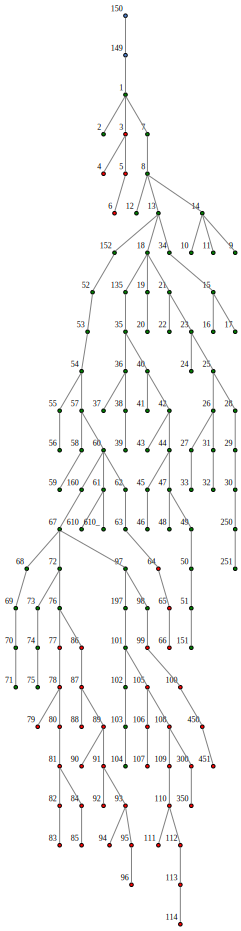

In [13]:
Source.from_file(heatMapNames[0]) # display graph in notebook

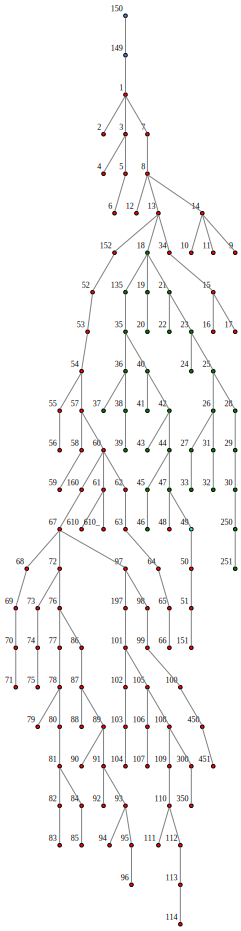

In [14]:
Source.from_file(heatMapNames[1]) # display graph in notebook

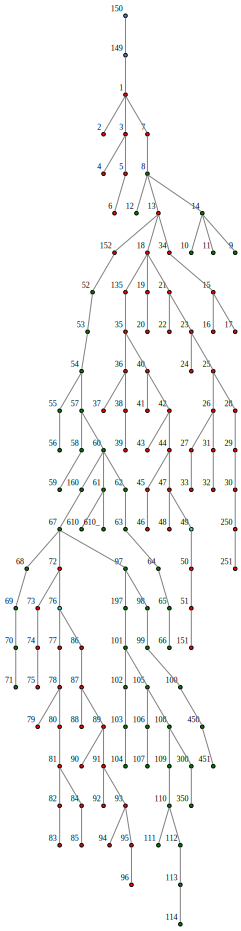

In [15]:
Source.from_file(heatMapNames[2]) # display graph in notebook